<a href="https://colab.research.google.com/github/SonamRohilla/SQL-for-Data-Science/blob/master/animal_moment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

In [3]:
animal_data = pd.read_csv('animal_speeds.csv', delimiter=';', header=0)

Exploratory Data Analysis


In [4]:
animal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   animal         159 non-null    object 
 1   weight         159 non-null    float64
 2   movement_type  159 non-null    object 
 3   highspeed      159 non-null    float64
dtypes: float64(2), object(2)
memory usage: 5.1+ KB


In [5]:
animal_data.describe(include='all')

,animal,weight,movement_type,highspeed
count,159,159.000000,159,159.000000
unique,154,NaN,4,NaN
top,Alligator,NaN,running,NaN
freq,2,NaN,78,NaN
mean,NaN,1994.115969,NaN,52.640881
std,NaN,12285.311105,NaN,34.460258
min,NaN,0.001000,NaN,1.500000
25%,NaN,2.625000,NaN,30.000000
50%,NaN,22.000000,NaN,48.000000
75%,NaN,310.000000,NaN,70.000000


In [6]:
animal_data.head()

,animal,weight,movement_type,highspeed
0,House sparrow,0.04,flying,46.0
1,Pelican,7.80,flying,65.0
2,Vulture,11.00,flying,88.0
3,Pigeon,0.35,flying,80.0
4,Puffin,0.58,flying,88.0


In [20]:
numerical_features = [feature for feature in animal_data.columns if animal_data[feature].dtypes != 'O']
categorical_features = [feature for feature in animal_data.columns if animal_data[feature].dtype == 'O']
print("numerical_features")
print(numerical_features)
print()
print('categorical_features')
print(categorical_features)

numerical_features
['weight', 'highspeed']

categorical_features
['animal', 'movement_type']


Checking NUll Values in Data

In [7]:
animal_data.isnull()

,animal,weight,movement_type,highspeed
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
154,False,False,False,False
155,False,False,False,False
156,False,False,False,False
157,False,False,False,False


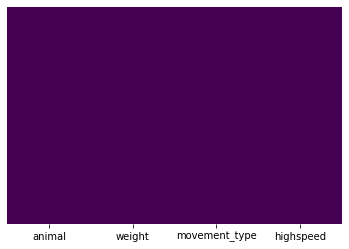

In [8]:
sns.heatmap(animal_data.isnull(),yticklabels=False, cbar=False, cmap='viridis')

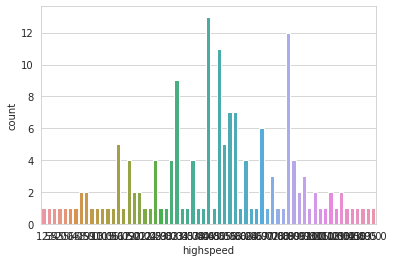

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='highspeed', data=animal_data)

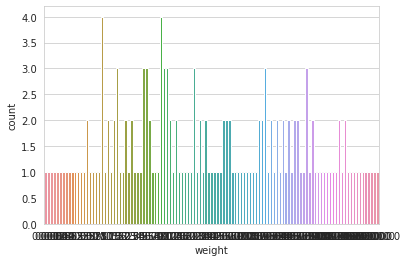

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='weight', data=animal_data)

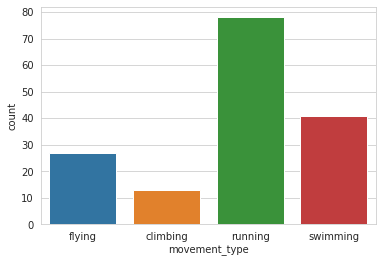

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='movement_type', data=animal_data)

Around 78% animals' movement type is running, 41% is swimming and 28%, 13%  animals' movement type is flying and climbing respectively.

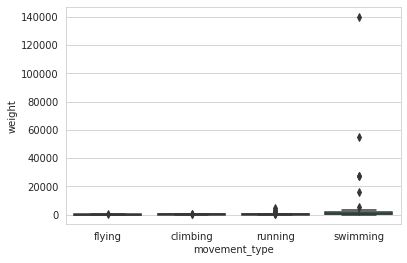

In [12]:
sns.boxplot(x='movement_type', y='weight', data=animal_data, palette='winter')

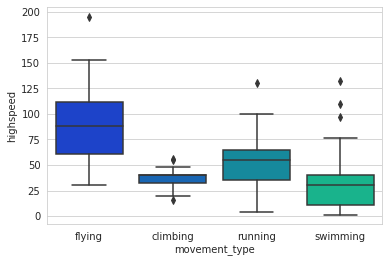

In [13]:
sns.boxplot(x='movement_type', y='highspeed', data=animal_data, palette='winter')

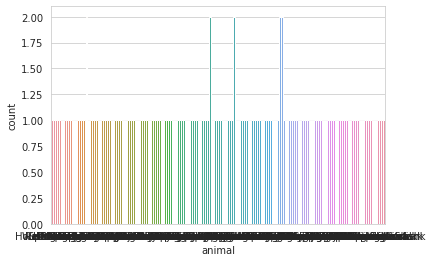

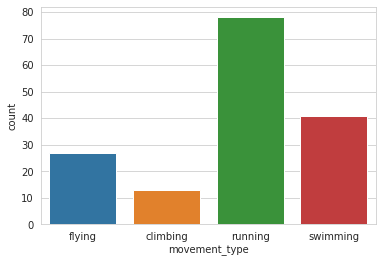

In [21]:
for feature in categorical_features:
    sns.countplot(data=animal_data, x=feature)
    plt.show()

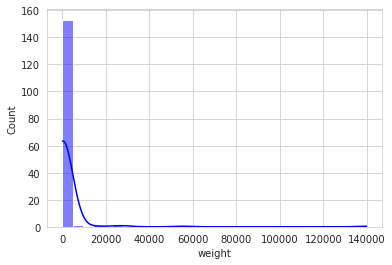

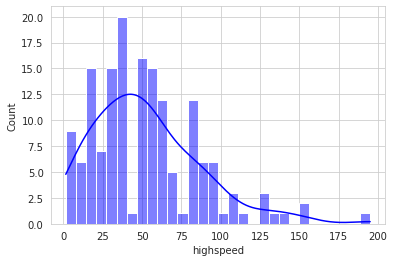

In [22]:
for feature in numerical_features:
    sns.histplot(data=animal_data, x=feature,kde=True, bins=30, color='blue')
    plt.show();

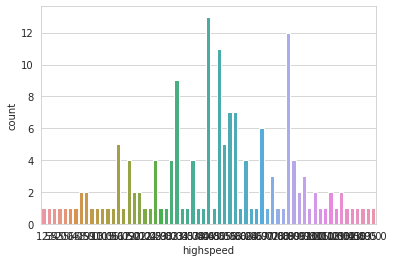

In [18]:
sns.countplot(x='highspeed', data= animal_data)

converting categorial features

In [23]:
movement=pd.get_dummies(animal_data['movement_type']).head()

In [24]:
movement.head()

,climbing,flying,running,swimming
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [26]:
animal_data1=pd.concat([animal_data,movement],axis=1)

In [27]:
animal_data1.head()

,animal,weight,movement_type,highspeed,climbing,flying,running,swimming,climbing,flying,running,swimming
0,House sparrow,0.04,flying,46.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Pelican,7.80,flying,65.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Vulture,11.00,flying,88.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Pigeon,0.35,flying,80.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Puffin,0.58,flying,88.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
